# Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Importación del dataset

In [2]:
churn_data_set = pd.read_csv("..\Data\Churn Prediction.csv",delimiter = ";",index_col=0)
churn_data_set.drop('Surname', inplace = True, axis = 1)
churn_data_set.drop('Id', inplace = True, axis = 1)

churn_data_set['score_by_products'] = churn_data_set['Score'] / churn_data_set['Products']

churn_data_set.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products
Row,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619.000000
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608.000000
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,167.333333
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,349.500000
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850.000000


In [3]:
churn_data_set = pd.get_dummies(churn_data_set, columns=["Nationality", "Gender"])


In [4]:
churn_data_set.head()

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products,Nationality_France,Nationality_Germany,Nationality_Spain,Gender_Female,Gender_Male
Row,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,619.000000,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,608.000000,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,167.333333,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,349.500000,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,850.000000,0,0,1,1,0


## Análisis dataset

In [5]:
churn_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                10000 non-null  int64  
 1   Age                  10000 non-null  int64  
 2   Tenure               10000 non-null  int64  
 3   Balance              10000 non-null  float64
 4   Products             10000 non-null  int64  
 5   Card                 10000 non-null  int64  
 6   Active               10000 non-null  int64  
 7   Salary               10000 non-null  float64
 8   Exited               10000 non-null  int64  
 9   score_by_products    10000 non-null  float64
 10  Nationality_France   10000 non-null  uint8  
 11  Nationality_Germany  10000 non-null  uint8  
 12  Nationality_Spain    10000 non-null  uint8  
 13  Gender_Female        10000 non-null  uint8  
 14  Gender_Male          10000 non-null  uint8  
dtypes: float64(3), int64(7), uint8(5)
me

In [6]:
churn_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Active,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
score_by_products,10000.0,486.417308,183.636877,94.00,323.00,443.000,653.0000,850.00


# Entrenamiento y test

In [7]:
X = churn_data_set.drop(["Exited","Nationality_Spain","Gender_Female"], axis=1) 
y = churn_data_set.Exited

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                10000 non-null  int64  
 1   Age                  10000 non-null  int64  
 2   Tenure               10000 non-null  int64  
 3   Balance              10000 non-null  float64
 4   Products             10000 non-null  int64  
 5   Card                 10000 non-null  int64  
 6   Active               10000 non-null  int64  
 7   Salary               10000 non-null  float64
 8   score_by_products    10000 non-null  float64
 9   Nationality_France   10000 non-null  uint8  
 10  Nationality_Germany  10000 non-null  uint8  
 11  Gender_Male          10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 810.5 KB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [10]:
X_train.head()

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,score_by_products,Nationality_France,Nationality_Germany,Gender_Male
Row,,,,,,,,,,,,
9070,619,32,4,175406.13,2,1,1,172792.43,309.5,0,0,0
2604,643,34,7,160426.07,1,0,1,188533.11,643.0,0,1,0
7739,561,33,6,0.00,2,0,0,173680.39,280.5,1,0,1
1580,618,41,8,37702.79,1,1,1,195775.48,618.0,0,1,1
5059,714,37,9,148466.93,2,0,1,151280.96,357.0,1,0,1


# Arboles de desición

In [11]:
tree = DecisionTreeClassifier(max_depth=7, random_state = 42) #Creamos el modelo

In [12]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [13]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test)

In [14]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8751428571428571
% de aciertos sobre el set de evaluación: 0.8606666666666667


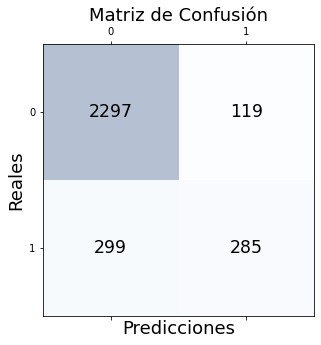

In [15]:
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

In [16]:
scores = cross_val_score(tree, X, y, cv=10,scoring='recall')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.46 accuracy with a standard deviation of 0.05


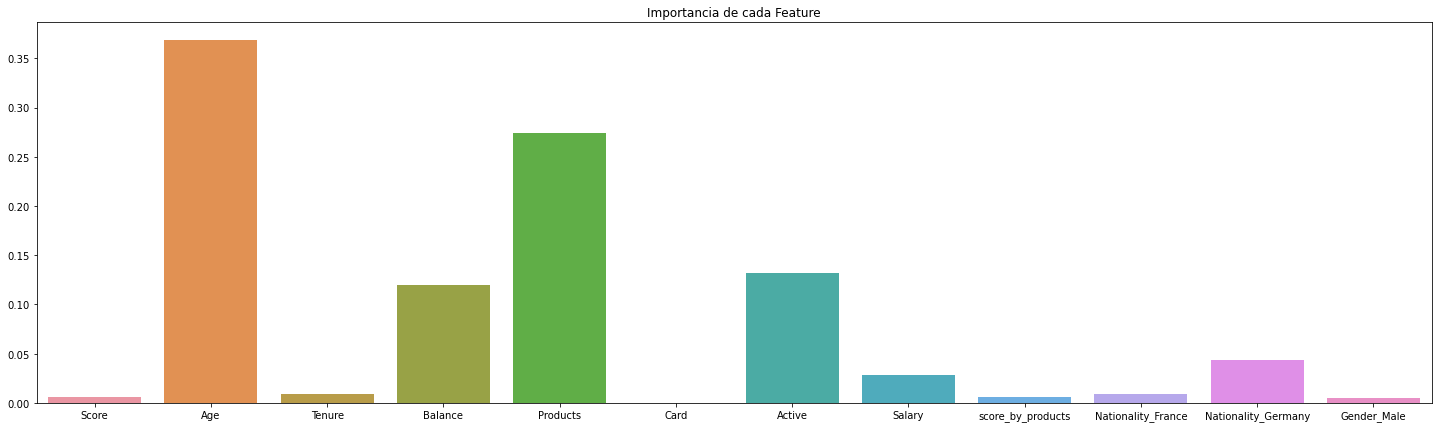

In [17]:
plt.figure(figsize=(25,7))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y =importances)
plt.title('Importancia de cada Feature')
plt.show()

## Tomo los balances > 0

In [20]:
X = churn_data_set.loc[churn_data_set['Balance'] != 0].drop(["Exited","Nationality_Spain","Gender_Female"], axis=1) 
y = churn_data_set.loc[churn_data_set['Balance'] != 0].Exited

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [23]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [24]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test)

In [25]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8563115487914056
% de aciertos sobre el set de evaluación: 0.8135770234986945


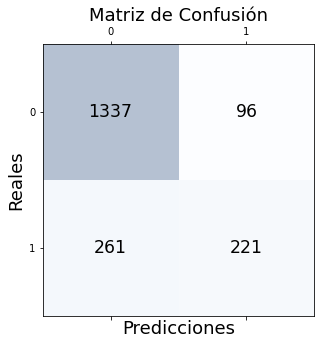

In [26]:
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

In [27]:
scores = cross_val_score(tree, X, y, cv=10,scoring='recall')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.06


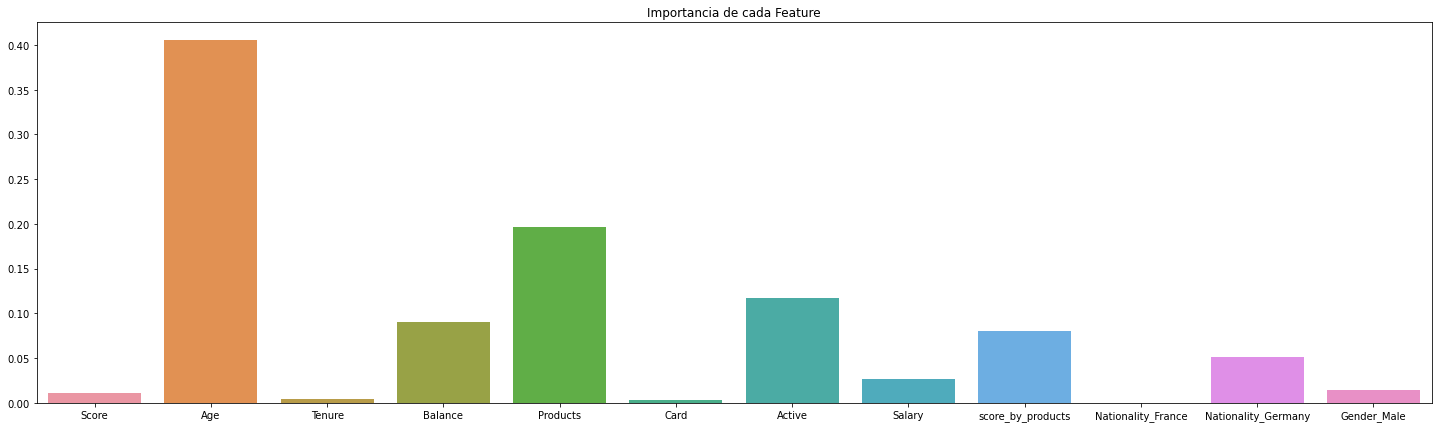

In [28]:
plt.figure(figsize=(25,7))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y =importances)
plt.title('Importancia de cada Feature')
plt.show()

## Arboles de desición con la variables más importantes

Se quita del dataset las columnas de: Score, Tenure, Card, Score_by_product, Nationality y Gender

In [29]:
X = churn_data_set.drop(["Exited","Nationality_Spain","Nationality_France","Nationality_Germany","Gender_Female","Gender_Male", "Card", "Score", "Tenure", "score_by_products"], axis=1) 
y = churn_data_set.Exited

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [31]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [32]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test)

In [33]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.865
% de aciertos sobre el set de evaluación: 0.8546666666666667


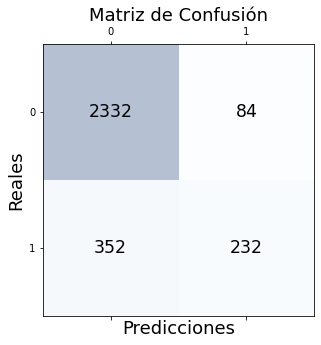

In [34]:
matriz = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matriz, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(x=j, y=i,s=matriz[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Reales', fontsize=18)
plt.title('Matriz de Confusión', fontsize=18)
plt.show()

In [35]:
scores = cross_val_score(tree, X, y, cv=10,scoring='recall')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.42 accuracy with a standard deviation of 0.04


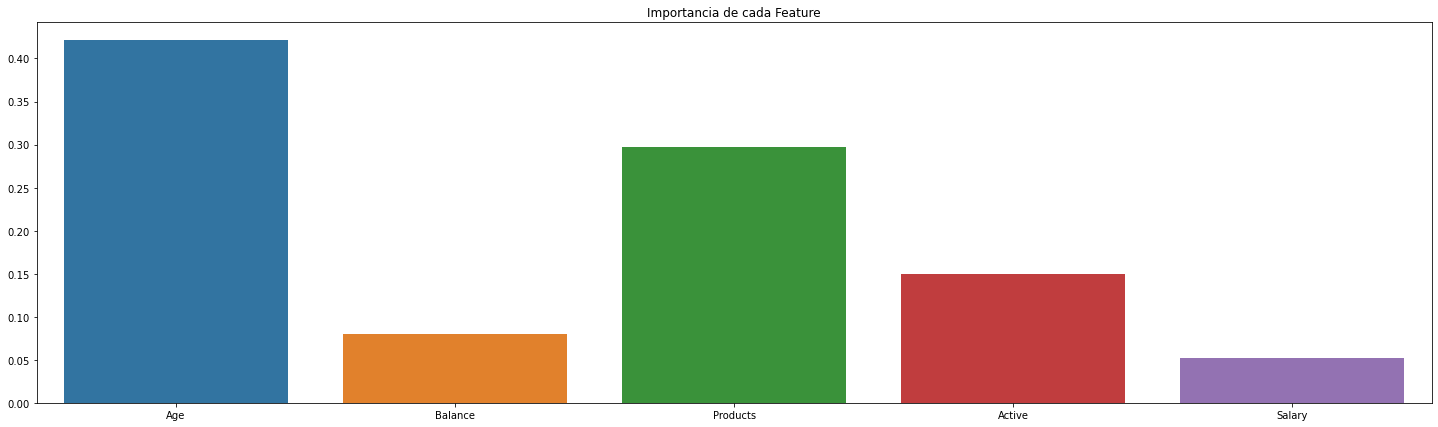

In [36]:
plt.figure(figsize=(25,7))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y =importances)
plt.title('Importancia de cada Feature')
plt.show()